In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
print(f'Training samples {len(x_train):,}')
print(f'Test samples {len(x_test):,}')

Training samples 60,000
Test samples 10,000


In [7]:
def show(idx):
    print(y_train[idx])
    plt.imshow(x_train[idx])

4


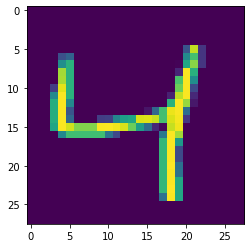

In [8]:
show(2)

In [11]:
np.random.seed(23)
tf.random.set_seed(23)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0003),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                15050     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 251,060
Trainable params: 251,060
Non-trainable params: 0
________________________________________________

In [12]:
model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 3.6815 - accuracy: 0.2927
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6498 - accuracy: 0.4234
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2441 - accuracy: 0.6021
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9678 - accuracy: 0.7105
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7819 - accuracy: 0.7728
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6522 - accuracy: 0.8159
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5565 - accuracy: 0.8490
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4791 - accuracy: 0.8759
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3969 - accuracy: 0.8952
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.357

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1441 - accuracy: 0.0983


[0.14413496851921082, 0.09830000251531601]

In [20]:
model.save('mnist')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mnist\assets


In [16]:
from tensorflow import keras
model = keras.models.load_model('mnist.h5')

In [17]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

9


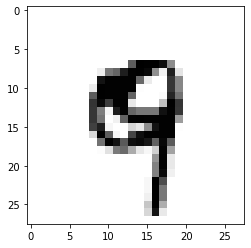

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [126]:
import onnxmltools
import os

In [127]:
# Convert the Keras model into ONNX
onnx_model = onnxmltools.convert_keras(model)

tf executing eager_mode: True
tf.keras model eager_mode: False
The ONNX operator number change on the optimization: 16 -> 10
The maximum opset needed by this model is only 11.


In [128]:
# Save ONNX model
onnxmltools.utils.save_model(onnx_model, 'mnist.onnx')

In [129]:
print(os.path.getsize('mnist.h5')) # byte of old keras model.
print(os.path.getsize('mnist.onnx')) # byte of new onnx model.

3047880
1005177


In [130]:
#### inference with onnx

8


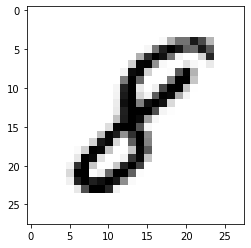

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys');

In [148]:
x=np.array(x_test[image_index]).reshape(1, 28, 28, 1)

In [149]:
import onnxruntime
sess = onnxruntime.InferenceSession("mnist.onnx")

In [150]:
x.shape

(1, 28, 28, 1)

In [153]:
cls_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

x = x if isinstance(x, list) else [x]

feed = dict([(input.name, x[n]) for n, input in enumerate(sess.get_inputs())])
pred_onnx = sess.run(None, feed)[0]

InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Unexpected input data type

In [ ]:
#squeezes the numpy matrix to numpy vector, i.e., remove the 0-th dimension, 
#so that we can get the probabilities of each class.
pred = np.squeeze(pred_onnx)

top_inds = pred.argsort()[::-1][:5]
for i in top_inds:
    print('    {:.3f}  {}'.format(pred[i], cls_list[i]))

In [132]:
#Preprocess the image
img = cv2.imread(path)
img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
img = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_AREA)
img.resize((1, 1, 28, 28))

data = json.dumps({'data': img.tolist()})
data = np.array(json.loads(data)['data']).astype('float32')

NameError: name 'cv2' is not defined